In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
!pip install matplotlip

In [4]:
!pip install pandas_datareader

In [5]:
!pip install sklearn

In [6]:
!pip install keras

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [8]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415357
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515211
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526478
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422666
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791


In [9]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.623222
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.004585
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,70.977631
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.398880
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,71.920570


In [10]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415357
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515211
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526478
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422666
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791


In [12]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


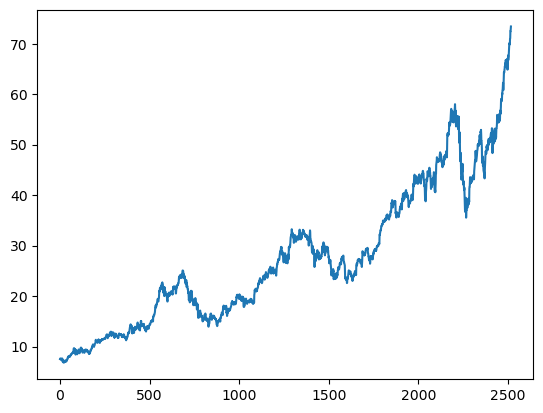

In [13]:
plt.plot(df.Close)

In [14]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [15]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

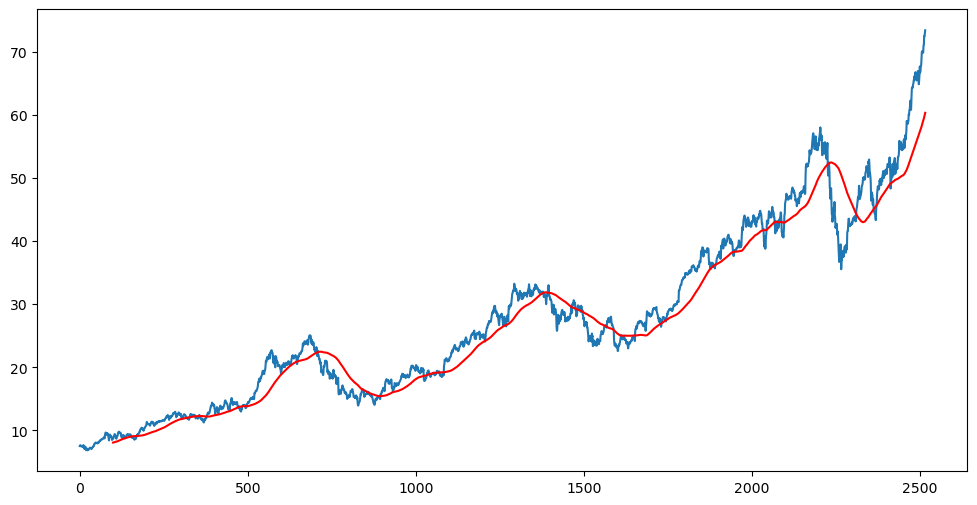

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [17]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

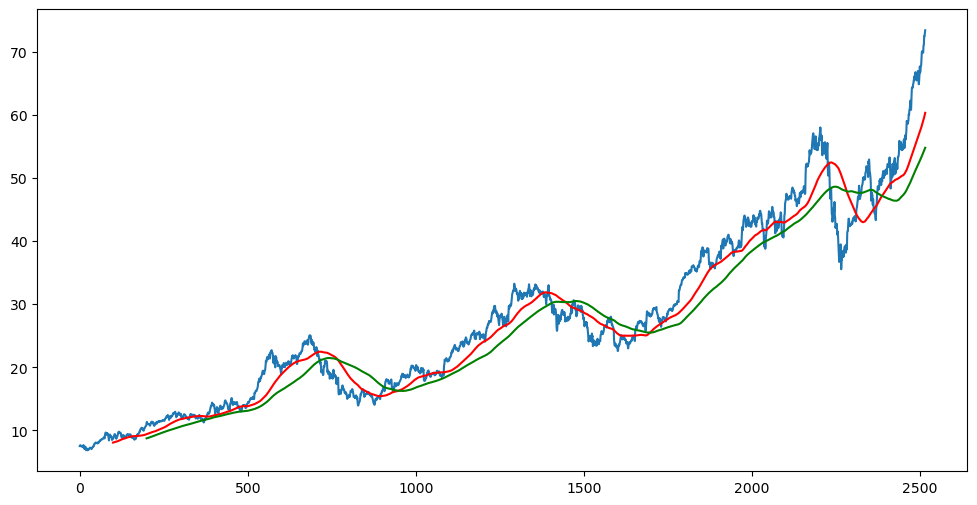

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [19]:
df.shape

(2517, 5)

In [20]:
#Spillting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [21]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [22]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [25]:
x_train =[]
y_train =[]
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
!pip install sequential

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sequential: filename=sequential-1.0.0-py3-none-any.whl size=2856 sha256=674be1ed950ee82080e302a209c26be7902b250158101ec6ce9086d90b763f06
  Stored in directory: c:\users\hashneet\appdata\local\pip\cache\wheels\e9\75\a4\285f10d64daf30955cb07d31a37f9f83fcd5779c6773e18f48
Successfully built sequential


In [30]:
!pip install layers

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for layers: filename=layers-0.1.5-py3-none-any.whl size=5355 sha256=3b45b51b7e316086b856f059d31c7e3eb5fc62975a192b5391b4a8555c82e8f5
  Stored in directory: c:\users\hashneet\appdata\local\pip\cache\wheels\f8\4d\ec\d396d8edcf2930f3d1f06af3e62e7bae9e24b19f0fa593e413
  Created wheel for bashutils: filename=Bashutils-0.0.4-py3-none-any.whl size=5459 sha256=7c2b4d2e8f58847b36fb352fc619a35269f2c8a9ebfc36060c89a86b60a24def
  Stored in directory: c:\users\hashneet\appdata\local\pip\cache\wheels\a1\db\d5\c7823b68c53a5b141f3265057d95f872a984b37a058ccb761c
Successfully built layers bashutils


In [40]:
!pip install keras.models

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
     ---------------------------------------- 11.9/11.9 MB 6.4 MB/s eta 0:00:00
     -------------------------------------- 481.4/481.4 kB 6.0 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 42.8/42.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 1.4 MB/s eta 0:00:00


In [44]:
#ML MODEL

In [56]:
!pip install tensorflow

In [57]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [58]:
#First Layer
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

#Second Layer
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

#Third Layer
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

#Fourth Layer
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

#Dense Layer
model.add(Dense(units = 1))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [60]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 34s 494ms/step - loss: 0.0550
Epoch 2/50
52/52 [==============================] - 26s 498ms/step - loss: 0.0124
Epoch 3/50
52/52 [==============================] - 26s 490ms/step - loss: 0.0108
Epoch 4/50
52/52 [==============================] - 26s 498ms/step - loss: 0.0097
Epoch 5/50
52/52 [==============================] - 26s 507ms/step - loss: 0.0096
Epoch 6/50
52/52 [==============================] - 24s 466ms/step - loss: 0.0084
Epoch 7/50
52/52 [==============================] - 22s 422ms/step - loss: 0.0089
Epoch 8/50
52/52 [==============================] - 23s 444ms/step - loss: 0.0077
Epoch 9/50
52/52 [==============================] - 24s 459ms/step - loss: 0.0077
Epoch 10/50
52/52 [==============================] - 24s 470ms/step - loss: 0.0075
Epoch 11/50
52/52 [==============================] - 22s 425ms/step - loss: 0.0077
Epoch 12/50
52/52 [==============================] - 23s 440ms/step - loss: 0.0072
Epoch 13/50
5

In [68]:
model.save('keras_model.h5')

In [69]:
past_100_days = data_training.tail(100)

In [70]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\HASHNEET\AppData\Local\Temp\ipykernel_32848\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [64]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [65]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [66]:
input_data.shape

(856, 1)

In [72]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [73]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [74]:
#Making Predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 4s 134ms/step


In [76]:
y_predicted.shape

(756, 1)

In [77]:
scaler.scale_

array([0.02099517])

In [78]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

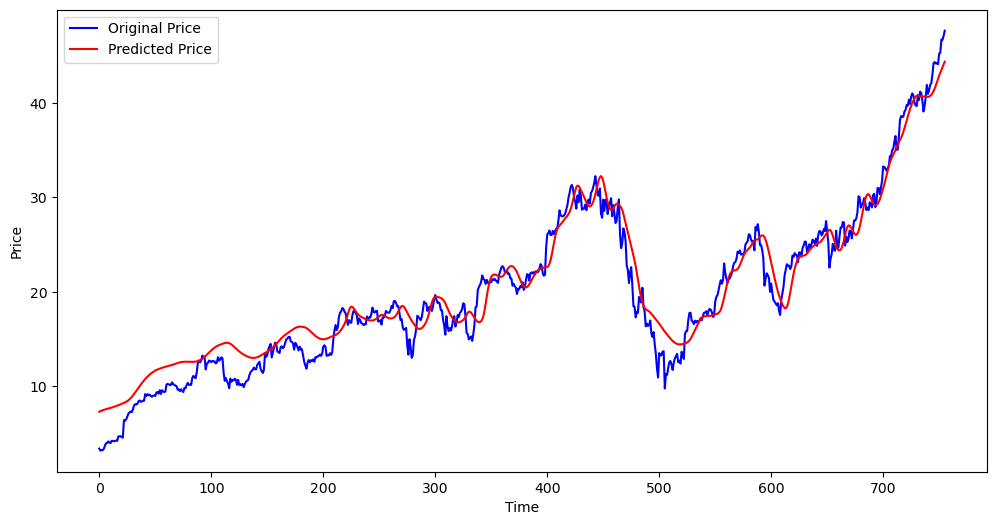

In [81]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [84]:
!pip install streamlit